In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv('final_cleaned_tmdb.csv', keep_default_na=False)
# print columns with nan values
print(df.isna().sum())

imdb_id                 0
tmdb_id                 0
title                   0
genres                  0
revenue                 0
budget                  0
runtime                 0
vote_average            0
vote_count              0
top_cast                0
director                0
keywords                0
spoken_languages        0
collection_name         0
watch_providers         0
production_companies    0
certification           0
overview                0
poster_url              0
themes                  0
day                     0
month                   0
year                    0
dtype: int64


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104763 entries, 0 to 104762
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   imdb_id               104763 non-null  object 
 1   tmdb_id               104763 non-null  int64  
 2   title                 104763 non-null  object 
 3   genres                104763 non-null  object 
 4   revenue               104763 non-null  int64  
 5   budget                104763 non-null  int64  
 6   runtime               104763 non-null  int64  
 7   vote_average          104763 non-null  float64
 8   vote_count            104763 non-null  int64  
 9   top_cast              104763 non-null  object 
 10  director              104763 non-null  object 
 11  keywords              104763 non-null  object 
 12  spoken_languages      104763 non-null  object 
 13  collection_name       104763 non-null  object 
 14  watch_providers       104763 non-null  object 
 15  

array([[<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'budget'}>],
       [<Axes: title={'center': 'vote_average'}>,
        <Axes: title={'center': 'vote_count'}>],
       [<Axes: title={'center': 'runtime'}>, <Axes: >]], dtype=object)

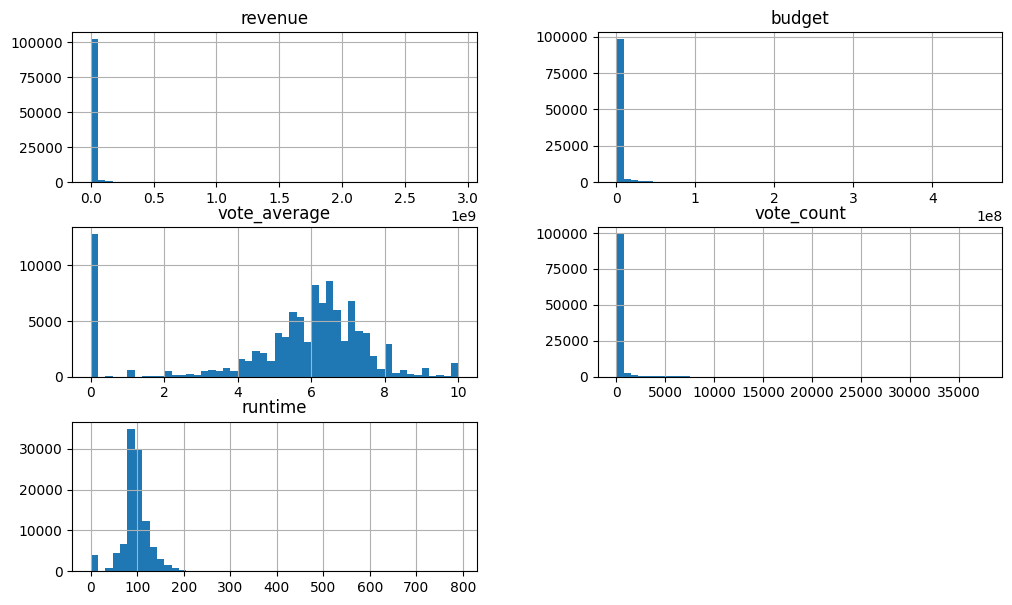

In [72]:
numeric_columns = ['revenue', 'budget', 'vote_average', 'vote_count', 'runtime']
df.hist(numeric_columns, figsize=(12,7), bins=50)

### Most numeric values have very distinct problems:
- revenue, budget, vote_average and vote_count all have an immense amount of values at 0
- runtime has a better spread but still a lot of values at zero, which doesnt make sense for movies

In [73]:
# remove where runtime is less than 45 minutes - 11 rows were removed
df = df[df['runtime'] > 45]

In [74]:
# remove rows where vote_count is less than 10
df = df[df['vote_count'] > 10]

In [75]:
# log transform numeric columns
for col in ["budget","revenue","runtime","vote_count"]:
    med = df[col].median()
    df[col] = df[col].fillna(med)
    df[f"{col}_log"] = np.log1p(df[col])


In [76]:
for col in ["budget","revenue"]:
    df[f"{col}_missing"] = (df[col] == 0).astype(int)

array([[<Axes: title={'center': 'budget_log'}>,
        <Axes: title={'center': 'revenue_log'}>],
       [<Axes: title={'center': 'runtime_log'}>,
        <Axes: title={'center': 'vote_count_log'}>]], dtype=object)

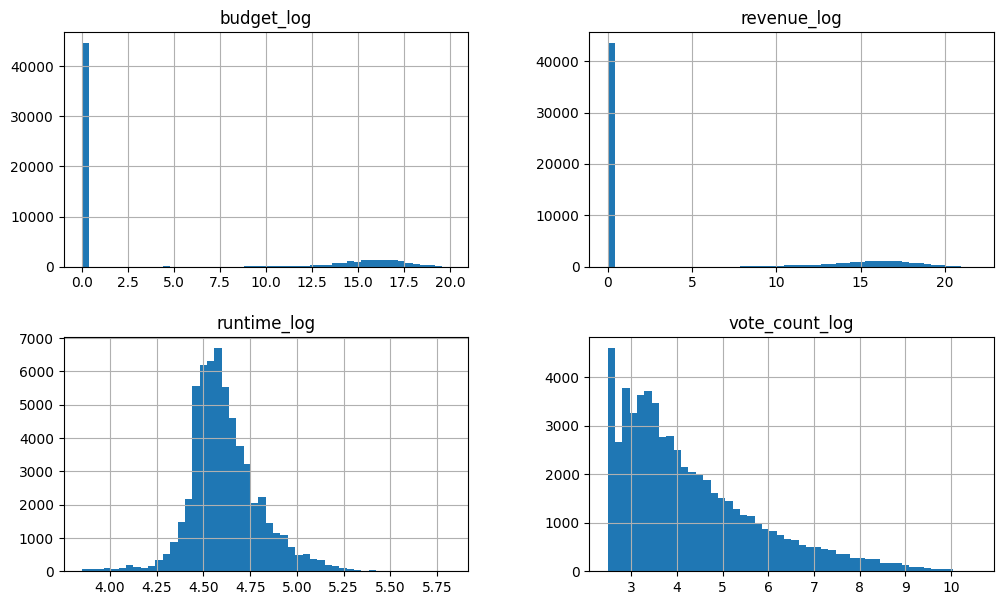

In [77]:
log_numeric_columns = [f"{col}_log" for col in ["budget","revenue","runtime","vote_count"]]
df.hist(log_numeric_columns, figsize=(12,7), bins=50)

### To address the budget and revenue skew at zero I have created a budget_missing / revenue_missing column 
 - this will help numeric part of the model understand that these values are either missing or there, giving the value less weight but more meaningful weight overall

In [78]:
df.to_csv('final_tmdb.csv', index=False)